<a href="https://colab.research.google.com/github/Maliha861/Maliha_WeatherWise-Assignment/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üå¶Ô∏è WeatherWise ‚Äì Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

üìÑ **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

üìù **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

üß† **This Notebook Structure is Optional**  
You‚Äôre encouraged to reorganise, rename sections, or remove scaffold cells if you prefer ‚Äî as long as your final version meets the requirements.

‚úÖ You may delete this note before submission.



## üß∞ Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


## üì¶ Setup and Configuration
Import required packages and setup environment.

In [20]:
# Install required packages
!pip install requests matplotlib pyinputplus fetch-my-weather hands-on-ai

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.7/143.7 kB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 155.5/155.5 kB 8.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.1/24.1 MB 88.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [21]:
# Core imports
import requests                      # API calls to wttr.in
import matplotlib.pyplot as plt      # Visualisations (line and bar charts)
import pyinputplus as pyip           # Interactive CLI menu
import re                            # Simple NLP parsing
import json                          # Pretty-printing JSON (testing/debug)
import sys                           # Environment/version checks

# Jupyter display
%matplotlib inline

# Global constants (aligned with rubric and wttr.in capabilities)
WTTR_BASE = "https://wttr.in"        # Base API URL
DEFAULT_LOCATION = "Perth"           # Default city
DEFAULT_FORECAST_DAYS = 3            # wttr.in JSON provides up to 3 days
UNITS = "m"                          # "m" metric, "u" US, "M" metric + m/s wind

# Environment check
print("Environment setup complete.")
print("Python version:", sys.version.split()[0])
print("Imports OK: requests, matplotlib, pyinputplus, re, json")

Environment setup complete.
Python version: 3.12.11
Imports OK: requests, matplotlib, pyinputplus, re, json


## üå§Ô∏è Weather Data Functions

In [1]:
# Weather Data Functions ‚Äî get_weather_data (with small TTL cache)

import time
import requests

# Tiny in-memory TTL cache (bonus-friendly, keeps API calls down)
class _TTLCache:
    def __init__(self):
        self._store = {}  # key -> (expires_at, value)
    def get(self, key):
        rec = self._store.get(key)
        if not rec:
            return None
        expires_at, value = rec
        if time.time() >= expires_at:
            self._store.pop(key, None)
            return None
        return value
    def set(self, key, value, ttl=600):
        self._store[key] = (time.time() + ttl, value)

WEATHER_CACHE = _TTLCache()
_CACHE_TTL_SECONDS = 600  # 10 minutes

def _safe_int(x, default=None):
    try: return int(x)
    except Exception: return default

def _safe_float(x, default=None):
    try: return float(x)
    except Exception: return default

def get_weather_data(location, forecast_days=3, units="m"):
    """
    Retrieve weather data for a specified location from wttr.in and normalise it.

    Args:
        location (str): City or location name.
        forecast_days (int): 1‚Äì3 (wttr.in JSON provides up to 3 days).
        units (str): "m" metric, "u" US, "M" metric + m/s wind.

    Returns:
        dict: {
          "location": str,
          "current": {...},
          "forecast": [ {"date","min_c","max_c","chance_of_rain","precip_mm"}, ... ]
        }
        or {"error": "..."} on failure.
    """
    if not location or not isinstance(location, str) or not location.strip():
        return {"error": "Please provide a valid location name."}
    location = location.strip()

    # Cap days to wttr.in limit
    forecast_days = max(1, min(int(forecast_days), 3))

    # Cache key
    cache_key = (location.lower(), forecast_days, units)
    cached = WEATHER_CACHE.get(cache_key)
    if cached is not None:
        return cached

    base_url = f"{WTTR_BASE}/{location}" if "WTTR_BASE" in globals() else f"https://wttr.in/{location}"
    params = {"format": "j1"}
    if units in ("m", "u", "M"):
        params[units] = ""

    try:
        resp = requests.get(
            base_url,
            params=params,
            timeout=10,
            headers={"User-Agent": "Weather-Advisor/1.0 (Student Project)", "Accept": "application/json"},
        )
        resp.raise_for_status()
        data = resp.json()
    except requests.exceptions.Timeout:
        return {"error": "The weather service took too long to respond. Please try again shortly."}
    except requests.exceptions.ConnectionError:
        return {"error": "Network connection error while contacting the weather service."}
    except requests.exceptions.HTTPError as e:
        code = getattr(e.response, "status_code", "Unknown")
        return {"error": f"Weather service returned an HTTP error (status {code})."}
    except requests.exceptions.RequestException:
        return {"error": "Unexpected network error occurred while fetching weather data."}
    except ValueError:
        return {"error": "Invalid JSON response from wttr.in."}

    # Current conditions
    cc = (data.get("current_condition") or [{}])[0]
    current = {
        "temp_c": _safe_int(cc.get("temp_C")),
        "feels_like_c": _safe_int(cc.get("FeelsLikeC")),
        "condition": ((cc.get("weatherDesc") or [{}])[0].get("value")) or "N/A",
        "humidity": _safe_int(cc.get("humidity")),
        "wind_kmph": _safe_int(cc.get("windspeedKmph")),
        "wind_dir": cc.get("winddir16Point") or "",
        "precip_mm": _safe_float(cc.get("precipMM"), 0.0),
        "uv_index": _safe_int(cc.get("uvIndex")),
    }

    # Forecast (up to 3 days)
    forecast_list = []
    for day in (data.get("weather") or [])[:forecast_days]:
        hourly = day.get("hourly") or []
        chance_of_rain = max((_safe_int(h.get("chanceofrain"), 0) for h in hourly), default=0)
        total_precip = sum((_safe_float(h.get("precipMM"), 0.0) for h in hourly))
        forecast_list.append({
            "date": day.get("date"),
            "min_c": _safe_int(day.get("mintempC")),
            "max_c": _safe_int(day.get("maxtempC")),
            "chance_of_rain": chance_of_rain,
            "precip_mm": round(total_precip, 1),
        })

    if not forecast_list:
        return {"error": "No forecast data returned for this location."}

    result = {"location": location, "current": current, "forecast": forecast_list}

    # Cache store
    WEATHER_CACHE.set(cache_key, result, ttl=_CACHE_TTL_SECONDS)
    return result


In [2]:
# Test the get_weather_data() function (3-day forecast from wttr.in)

import json

weather_data = get_weather_data("Perth", forecast_days=3, units="m")

print("Weather Data (3-Day Forecast):")
print(json.dumps(weather_data, indent=2))


Weather Data (3-Day Forecast):
{
  "location": "Perth",
  "current": {
    "temp_c": 23,
    "feels_like_c": 25,
    "condition": "Shower in vicinity",
    "humidity": 57,
    "wind_kmph": 30,
    "wind_dir": "NW",
    "precip_mm": 0.4,
    "uv_index": 8
  },
  "forecast": [
    {
      "date": "2025-10-04",
      "min_c": 15,
      "max_c": 21,
      "chance_of_rain": 100,
      "precip_mm": 4.4
    },
    {
      "date": "2025-10-05",
      "min_c": 12,
      "max_c": 16,
      "chance_of_rain": 100,
      "precip_mm": 1.5
    },
    {
      "date": "2025-10-06",
      "min_c": 10,
      "max_c": 19,
      "chance_of_rain": 0,
      "precip_mm": 0.0
    }
  ]
}


## üìä Visualisation Functions

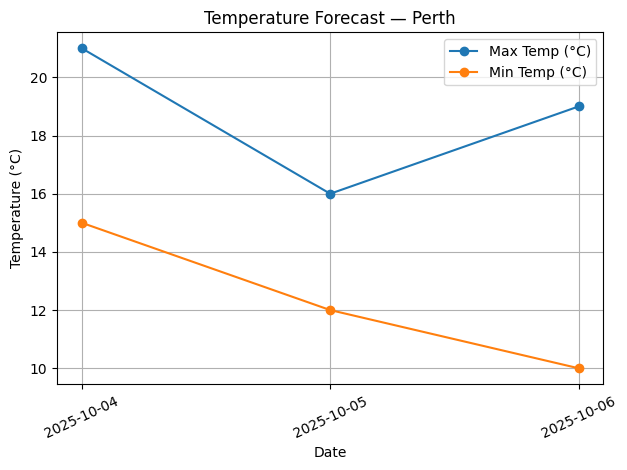

In [22]:
# Define create_temperature_visualisation() ‚Äî minimal, rubric-friendly

import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data (min/max ¬∞C line chart).
    """
    # Basic validation
    if not isinstance(weather_data, dict):
        raise TypeError("weather_data must be a dict as returned by get_weather_data().")
    if "error" in weather_data:
        print(weather_data["error"]); return None
    if "forecast" not in weather_data or not weather_data["forecast"]:
        print("No forecast data available to plot."); return None

    # Extract series (with safe numeric casting)
    dates = [str(d.get("date", "")) for d in weather_data["forecast"]]
    mins  = []
    maxs  = []
    for d in weather_data["forecast"]:
        mn = d.get("min_c"); mx = d.get("max_c")
        try: mn = float(mn) if mn is not None else None
        except: mn = None
        try: mx = float(mx) if mx is not None else None
        except: mx = None
        mins.append(mn); maxs.append(mx)

    # Build figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(dates, maxs, marker="o", label="Max Temp (¬∞C)")
    ax.plot(dates, mins, marker="o", label="Min Temp (¬∞C)")

    ax.set_title(f"Temperature Forecast ‚Äî {weather_data.get('location','')}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (¬∞C)")
    ax.grid(True)
    ax.legend()

    # Readability
    plt.xticks(rotation=25)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    plt.show(); plt.close(fig); return None

    # Show the temperature chart below

wd = get_weather_data("Perth", forecast_days=3, units="m")
fig = create_temperature_visualisation(wd, output_type='figure')
if fig:
    plt.figure(fig.number)
    plt.show()

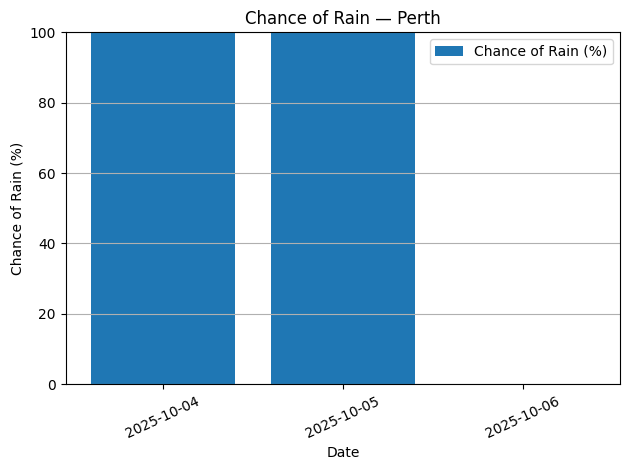

In [23]:
# Define create_precipitation_visualisation() here

import matplotlib.pyplot as plt

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data (Chance of Rain % bar chart).

    Args:
        weather_data (dict): The processed weather data from get_weather_data()
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib Figure object.
        Otherwise, displays the visualisation in the notebook and returns None.
    """
    # Basic validation
    if not isinstance(weather_data, dict):
        raise TypeError("weather_data must be a dict as returned by get_weather_data().")
    if "error" in weather_data:
        print(weather_data["error"]); return None
    if "forecast" not in weather_data or not weather_data["forecast"]:
        print("No forecast data available to plot."); return None

    # Extract series (safe casting + clamp 0..100)
    dates = [str(d.get("date", "")) for d in weather_data["forecast"]]
    chances = []
    for d in weather_data["forecast"]:
        v = d.get("chance_of_rain", 0) or 0
        try:
            v = int(v)
        except Exception:
            v = 0
        chances.append(max(0, min(v, 100)))

    # Build figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(dates, chances)

    # Titles/labels/legend/grid (rubric)
    ax.set_title(f"Chance of Rain ‚Äî {weather_data.get('location','')}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Chance of Rain (%)")
    ax.set_ylim(0, 100)
    ax.grid(axis='y')
    ax.legend(["Chance of Rain (%)"])

    # Readability
    plt.xticks(rotation=25)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    plt.show(); plt.close(fig); return None

wd = get_weather_data("Perth", forecast_days=3, units="m")
fig = create_precipitation_visualisation(wd, output_type='figure')
if fig:
    plt.figure(fig.number)
    plt.show()

## ü§ñ Natural Language Processing

In [15]:
# Natural Language Processing ‚Äî minimal fixes applied to your version

import re

# --- Internal helpers for NLP ---

_ATTR_ALIASES = {
    "rain": ["rain", "precip", "precipitation", "shower", "wet"],
    "temperature": ["temp", "temperature", "hot", "cold", "warm", "cool", "heat"],
    "wind": ["wind", "breeze", "gust"],
    "humidity": ["humidity", "humid"],
}

def _detect_attribute(q: str) -> str | None:
    ql = q.lower()
    for key, words in _ATTR_ALIASES.items():
        if any(w in ql for w in words):
            return key
    return None

def _detect_days_and_when(q: str) -> tuple[int, str]:
    """
    Returns (days, when_label)
      when_label in {"today","tomorrow","next"}
      days is clamped to 1..3 (wttr.in returns up to 3 days)
    """
    ql = q.lower()
    if "today" in ql:
        return (1, "today")
    if "tomorrow" in ql:
        return (2, "tomorrow")  # ensures index 1 is available in responder

    # Allow "next N day" or "next N days"
    m = re.search(r"\bnext\s+(\d+)\s+day(?:s)?\b", ql)
    if m:
        n = int(m.group(1))
        return (max(1, min(n, 3)), "next")

    # default window
    return (3, "next")

def _detect_location(q: str, fallback: str | None = None) -> str | None:
    """
    Extract a simple location after 'in' or 'for'.
    Example: 'Will it rain tomorrow in Perth?' -> 'Perth'
    """
    m = re.search(r"\b(?:in|for)\s+([A-Za-z][A-Za-z\s,.'-]{1,48})\b", q, re.IGNORECASE)
    if m:
        return m.group(1).strip()
    return fallback

# --- Public API ---

def parse_weather_question(question: str, default_location: str | None = None) -> dict:
    """
    Parse a natural-language weather question into structured intent.

    Returns:
        dict with keys:
          "location": str|None,
          "days": int (1..3),
          "attribute": "rain"|"temperature"|"wind"|"humidity"|None,
          "when": "today"|"tomorrow"|"next"
    """
    if not question or not isinstance(question, str):
        return {"error": "Please provide a question string."}

    attribute = _detect_attribute(question)
    days, when = _detect_days_and_when(question)
    # Use provided default or global DEFAULT_LOCATION if available
    fallback_loc = default_location or globals().get("DEFAULT_LOCATION")
    location = _detect_location(question, fallback=fallback_loc)

    # Clamp defensively
    days = max(1, min(int(days), 3))

    return {"location": location, "days": days, "attribute": attribute, "when": when}

def generate_weather_response(parsed: dict, weather_data: dict) -> str:
    """
    Generate a concise, human-readable answer from parsed intent and weather data.
    """
    if not parsed or ("error" in parsed):
        return parsed.get("error", "I couldn't understand the question.")
    if not weather_data or ("error" in weather_data):
        return weather_data.get("error", "I couldn't retrieve weather data.")

    loc = weather_data.get("location") or parsed.get("location") or "the requested location"
    when = parsed.get("when", "next")
    attr = parsed.get("attribute")

    fcast = weather_data.get("forecast", [])
    if not fcast:
        return f"No forecast data available for {loc}."

    # Select forecast window
    if when == "today":
        window = fcast[:1]
    elif when == "tomorrow":
        window = fcast[1:2] if len(fcast) >= 2 else fcast[:1]
    else:
        window = fcast[:max(1, min(parsed.get("days", len(fcast)), len(fcast)))]

    # Aggregations (defensive)
    def _min_val(k):
        vals = [d.get(k) for d in window if d.get(k) is not None]
        return min(vals) if vals else None

    def _max_val(k):
        vals = [d.get(k) for d in window if d.get(k) is not None]
        return max(vals) if vals else None

    def _sum_val(k):
        vals = [d.get(k) or 0 for d in window]
        return sum(vals) if vals else 0

    hi = _max_val("max_c")
    lo = _min_val("min_c")
    rainp = _max_val("chance_of_rain")
    precip = _sum_val("precip_mm")

    # Attribute-specific responses
    if attr == "rain":
        if len(window) == 1:
            d0 = window[0].get("date", "the day")
            rp = window[0].get("chance_of_rain")
            pm = window[0].get("precip_mm")
            rp_txt = f"{rp}%" if rp is not None else "unknown"
            pm_txt = f"{pm} mm" if pm is not None else "unknown"
            return f"In {loc} ({d0}), chance of rain is {rp_txt}, expected precipitation {pm_txt}."
        rp_txt = f"{rainp}%" if rainp is not None else "unknown"
        return (f"In {loc} over the next {len(window)} day(s), the maximum chance of rain is "
                f"{rp_txt} with a total of {precip:.1f} mm expected.")

    if attr == "temperature":
        if len(window) == 1:
            d0 = window[0].get("date", "the day")
            return f"In {loc} ({d0}), expect a high near {hi}¬∞C and a low around {lo}¬∞C."
        return (f"In {loc} over the next {len(window)} day(s), highs up to ~{hi}¬∞C "
                f"and lows down to ~{lo}¬∞C.")

    if attr == "wind":
        c = weather_data.get("current", {})
        ws = c.get("wind_kmph")
        wd = c.get("wind_dir", "")
        if ws is not None:
            return f"In {loc} {when}, current winds are about {ws} km/h {wd}."
        return f"In {loc} {when}, wind information is not available."

    if attr == "humidity":
        c = weather_data.get("current", {})
        h = c.get("humidity")
        if h is not None:
            return f"In {loc} {when}, current humidity is approximately {h}%."
        return f"In {loc} {when}, humidity information is not available."

    # Generic fallback
    cond = (weather_data.get("current") or {}).get("condition", "").lower() or "current conditions"
    if len(window) == 1:
        d0 = window[0].get("date", "the day")
        return (f"In {loc} ({d0}), it is {cond} with a high near {hi}¬∞C, low around {lo}¬∞C, "
                f"and up to {rainp if rainp is not None else 'unknown'}% chance of rain (‚âà{precip:.1f} mm total).")
    return (f"In {loc} over the next {len(window)} day(s), expect {cond}, highs up to ~{hi}¬∞C, "
            f"lows near ~{lo}¬∞C, and up to {rainp if rainp is not None else 'unknown'}% chance of rain (‚âà{precip:.1f} mm total).")


## üß≠ User Interface

In [26]:
# User Interface
# --------------

import pyinputplus as pyip

def _print_welcome(app_name="Weather Advisor", user_name=None, location=None, units="m", forecast_days=3):
    title = f"üå§Ô∏è  Welcome to {app_name}" if not user_name else f"üå§Ô∏è  Welcome to {app_name}, {user_name}"
    print("\n" + title)
    print("=" * len(title))
    unit_label = {"m": "Metric (¬∞C, km/h)", "u": "US (¬∞F, mph)", "M": "Metric (¬∞C, m/s)"}.get(units, units)
    parts = []
    if location:
        parts.append(f"Location: {location}")
    parts.append(f"Units: {unit_label}")
    parts.append(f"Forecast days: {forecast_days}")
    print(" | ".join(parts) + "\n")

def _print_current(weather_data: dict) -> None:
    if not isinstance(weather_data, dict) or "error" in weather_data:
        print(weather_data.get("error", "No data available."))
        return
    cur = weather_data.get("current", {}) or {}
    print(f"\nCurrent weather ‚Äî {weather_data.get('location','')}")
    print(f"  Condition : {cur.get('condition','N/A')}")
    print(f"  Temp      : {cur.get('temp_c','?')}¬∞C (feels {cur.get('feels_like_c','?')}¬∞C)")
    print(f"  Humidity  : {cur.get('humidity','?')}%")
    print(f"  Wind      : {cur.get('wind_kmph','?')} km/h {cur.get('wind_dir','')}")
    print(f"  Precip    : {cur.get('precip_mm','?')} mm")
    print(f"  UV Index  : {cur.get('uv_index','?')}\n")

def _print_forecast(weather_data: dict) -> None:
    if not isinstance(weather_data, dict) or "error" in weather_data:
        print(weather_data.get("error", "No data available."))
        return
    rows = weather_data.get("forecast", []) or []
    if not rows:
        print("No forecast data available.")
        return
    print(f"\nForecast ‚Äî {weather_data.get('location','')}")
    print("  Date         Min ¬∞C   Max ¬∞C   Rain%   Precip (mm)")
    print("  ---------------------------------------------------")
    for d in rows:
        date = str(d.get('date','YYYY-MM-DD')).ljust(12)
        mn   = str(d.get('min_c','?')).rjust(6)
        mx   = str(d.get('max_c','?')).rjust(8)
        rp   = str(d.get('chance_of_rain','?')).rjust(7)
        mm   = str(d.get('precip_mm','?')).rjust(12)
        print(f"  {date}{mn}{mx}{rp}{mm}")
    print("")

def main_menu(default_location: str = "Perth") -> None:
    """
    Interactive CLI menu for Weather Advisor.
    Requires:
      - get_weather_data()
      - create_temperature_visualisation()
      - create_precipitation_visualisation()
      - parse_weather_question()
      - generate_weather_response()
    """
    location = (default_location or globals().get("DEFAULT_LOCATION") or "Perth").strip()
    units = (globals().get("UNITS") or "m")
    forecast_days = 3  # wttr.in returns up to 3 days

    user_name = pyip.inputStr("Enter your name (optional, press Enter to skip): ", blank=True)
    _print_welcome(user_name=(user_name or None), location=location, units=units, forecast_days=forecast_days)

    while True:
        choice = pyip.inputMenu(
            [
                "Set/Change location",
                "Show current conditions",
                "Show forecast + charts",
                "Ask a weather question",
                "Settings",
                "Exit",
            ],
            numbered=True
        )

        if choice == "Set/Change location":
            loc = pyip.inputStr("Enter city/suburb (e.g., Perth): ").strip()
            if loc:
                location = loc
                print(f"Location set to: {location}")
                _print_welcome(user_name=(user_name or None), location=location, units=units, forecast_days=forecast_days)
            else:
                print("Location unchanged.")

        elif choice == "Show current conditions":
            data = get_weather_data(location, forecast_days=1, units=units)
            _print_current(data)

        elif choice == "Show forecast + charts":
            data = get_weather_data(location, forecast_days=forecast_days, units=units)
            if isinstance(data, dict) and "error" not in data:
                _print_forecast(data)
                create_temperature_visualisation(data)
                create_precipitation_visualisation(data)
            else:
                print(data.get("error", data))

        elif choice == "Ask a weather question":
            q = pyip.inputStr("Enter your question (e.g., 'Will it rain tomorrow in Perth?'): ").strip()
            if not q:
                print("Please enter a question.")
                continue
            parsed = parse_weather_question(q, default_location=location)
            loc_for_query = parsed.get("location") or location
            days_for_query = parsed.get("days", 3)
            data = get_weather_data(loc_for_query, forecast_days=days_for_query, units=units)
            print("\n" + generate_weather_response(parsed, data) + "\n")

        elif choice == "Settings":
            units_choice = pyip.inputMenu(
                ["m (metric ¬∞C, km/h)", "u (US ¬∞F, mph)", "M (metric+wind m/s)"],
                numbered=True
            )
            units = units_choice.split()[0]
            forecast_days = pyip.inputInt("Forecast days (1‚Äì3): ", min=1, max=3)
            print(f"Units set to: {units} | Forecast days set to: {forecast_days}")
            _print_welcome(user_name=(user_name or None), location=location, units=units, forecast_days=forecast_days)

        else:  # Exit
            print("Exiting Weather Advisor.")
            break

Enter your name (optional, press Enter to skip): Maliha

üå§Ô∏è  Welcome to Weather Advisor, Maliha
Location: Perth | Units: Metric (¬∞C, km/h) | Forecast days: 3

Please select one of the following:
1. Set/Change location
2. Show current conditions
3. Show forecast + charts
4. Ask a weather question
5. Settings
6. Exit
1
Enter city/suburb (e.g., Perth): Cannington
Location set to: Cannington

üå§Ô∏è  Welcome to Weather Advisor, Maliha
Location: Cannington | Units: Metric (¬∞C, km/h) | Forecast days: 3

Please select one of the following:
1. Set/Change location
2. Show current conditions
3. Show forecast + charts
4. Ask a weather question
5. Settings
6. Exit
3

Forecast ‚Äî Cannington
  Date         Min ¬∞C   Max ¬∞C   Rain%   Precip (mm)
  ---------------------------------------------------
  2025-10-04      13      21    100         3.5
  2025-10-05      11      16    100         0.3
  2025-10-06      10      21      0         0.0



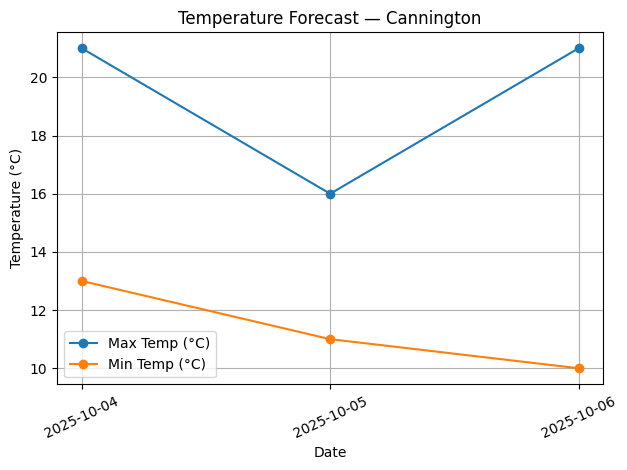

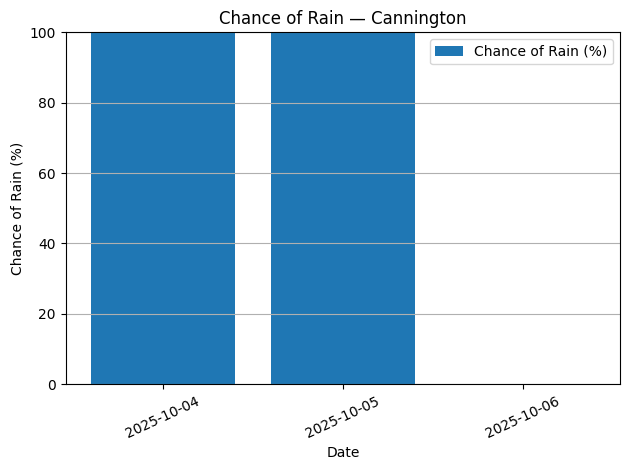

Please select one of the following:
1. Set/Change location
2. Show current conditions
3. Show forecast + charts
4. Ask a weather question
5. Settings
6. Exit
4
Enter your question (e.g., 'Will it rain tomorrow in Perth?'): Will it be sunny tomorrow?

In Cannington (2025-10-05), it is light rain with a high near 16¬∞C, low around 11¬∞C, and up to 100% chance of rain (‚âà0.3 mm total).

Please select one of the following:
1. Set/Change location
2. Show current conditions
3. Show forecast + charts
4. Ask a weather question
5. Settings
6. Exit
Thanks.
'Thanks.' is not a valid choice.
Please select one of the following:
1. Set/Change location
2. Show current conditions
3. Show forecast + charts
4. Ask a weather question
5. Settings
6. Exit
6
Exiting Weather Advisor.


In [27]:
# To start the interactive menu, run:
main_menu("Perth")

## üß© Main Application Logic

In [29]:
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response from parsed intent and normalised weather data.
    """
    # Basic validation
    if not isinstance(parsed_question, dict) or not parsed_question:
        return "I couldn't understand the question."
    if not isinstance(weather_data, dict) or "error" in weather_data:
        return weather_data.get("error", "Sorry, I couldn't retrieve weather data.")

    loc = weather_data.get("location") or parsed_question.get("location") or "the requested location"
    when = parsed_question.get("when", "next")
    attr = parsed_question.get("attribute")

    forecast = weather_data.get("forecast") or []
    if not forecast:
        return f"No forecast data available for {loc}."

    # Select the time window
    if when == "today":
        window = forecast[:1]
    elif when == "tomorrow":
        window = forecast[1:2] if len(forecast) >= 2 else forecast[:1]
    else:  # "next" or unspecified
        n = parsed_question.get("days", len(forecast))
        window = forecast[:max(1, min(n, len(forecast)))]

    # Aggregation helpers
    def _vals(key):
        return [d.get(key) for d in window if d.get(key) is not None]

    def _min(key):
        v = _vals(key);  return min(v) if v else None

    def _max(key):
        v = _vals(key);  return max(v) if v else None

    def _sum(key):
        return sum((d.get(key) or 0) for d in window)

    hi = _max("max_c")
    lo = _min("min_c")
    rainp_max = _max("chance_of_rain")
    precip_sum = _sum("precip_mm")

    # Attribute-specific responses
    if attr == "rain":
        if len(window) == 1:
            d0 = window[0].get("date", "the day")
            rp = window[0].get("chance_of_rain")
            pm = window[0].get("precip_mm")
            rp_txt = f"{rp}%" if rp is not None else "unknown"
            pm_txt = f"{pm:.1f} mm" if isinstance(pm, (int, float)) else "unknown"
            return f"In {loc} ({d0}), chance of rain is {rp_txt}, expected precipitation {pm_txt}."
        rp_txt = f"{rainp_max}%" if rainp_max is not None else "unknown"
        return (f"In {loc} over the next {len(window)} day(s), the maximum chance of rain is "
                f"{rp_txt} with a total of {precip_sum:.1f} mm expected.")

    if attr == "temperature":
        if len(window) == 1:
            d0 = window[0].get("date", "the day")
            return f"In {loc} ({d0}), expect a high near {hi}¬∞C and a low around {lo}¬∞C."
        return (f"In {loc} over the next {len(window)} day(s), highs up to ~{hi}¬∞C "
                f"and lows down to ~{lo}¬∞C.")

    if attr == "wind":
        cur = weather_data.get("current") or {}
        ws = cur.get("wind_kmph")
        wd = cur.get("wind_dir", "")
        if ws is not None:
            return f"In {loc} {when}, current winds are about {ws} km/h {wd}."
        return f"In {loc} {when}, wind information is not available."

    if attr == "humidity":
        cur = weather_data.get("current") or {}
        h = cur.get("humidity")
        if h is not None:
            return f"In {loc} {when}, current humidity is approximately {h}%."
        return f"In {loc} {when}, humidity information is not available."

    # Generic fallback summary
    cond = (weather_data.get("current") or {}).get("condition", "current conditions").lower()
    if len(window) == 1:
        d0 = window[0].get("date", "the day")
        rp_txt = f"{rainp_max}%" if rainp_max is not None else "unknown"
        return (f"In {loc} ({d0}), it is {cond} with a high near {hi}¬∞C, low around {lo}¬∞C, "
                f"and up to {rp_txt} chance of rain (‚âà{precip_sum:.1f} mm total).")
    rp_txt = f"{rainp_max}%" if rainp_max is not None else "unknown"
    return (f"In {loc} over the next {len(window)} day(s), expect {cond}, highs up to ~{hi}¬∞C, "
            f"lows near ~{lo}¬∞C, and up to {rp_txt} (‚âà{precip_sum:.1f} mm total).")


## üß™ Testing and Examples

In [30]:
# Test for generate_weather_response
q = "Will it rain tomorrow in Perth?"
parsed = parse_weather_question(q, default_location="Perth")
wd = get_weather_data(parsed.get("location","Perth"), forecast_days=parsed.get("days",3), units="m")
print("Q:", q)
print("Parsed:", parsed)
print("Response:", generate_weather_response(parsed, wd))


Q: Will it rain tomorrow in Perth?
Parsed: {'location': 'Perth', 'days': 2, 'attribute': 'rain', 'when': 'tomorrow'}
Response: In Perth (2025-10-05), chance of rain is 100%, expected precipitation 1.5 mm.


In [40]:
# Test 1 ‚Äî Weather Data API
import json

print("Test 1: get_weather_data (Perth, 3 days, metric)")
data_ok = get_weather_data("Perth", forecast_days=3, units="m")
if isinstance(data_ok, dict) and "error" not in data_ok:
    print("OK:", list(data_ok.keys()))
    print("Forecast length:", len(data_ok.get("forecast", [])))
    print("Sample day:", data_ok["forecast"][0] if data_ok.get("forecast") else "N/A")
else:
    print("Error:", data_ok)

Test 1: get_weather_data (Perth, 3 days, metric)
OK: ['location', 'current', 'forecast']
Forecast length: 3
Sample day: {'date': '2025-10-04', 'min_c': 15, 'max_c': 21, 'chance_of_rain': 100, 'precip_mm': 4.4}


In [39]:
# Test 2 ‚Äî Weather Data API (invalid input)

print("Test 2: get_weather_data (empty location)")
data_bad_input = get_weather_data("", forecast_days=3, units="m")
print(data_bad_input)


Test 2: get_weather_data (empty location)
{'error': 'Please provide a valid location name.'}


In [41]:
# Test 3 ‚Äî Weather Data API (unlikely location)

print("Test 3: get_weather_data ('Xxxyville')")
data_weird = get_weather_data("Xxxyville", forecast_days=3, units="m")
print("Type:", type(data_weird).__name__)
print(data_weird if "error" in data_weird else {"location": data_weird.get("location"),
                                                "forecast_len": len(data_weird.get("forecast", []))})


Test 3: get_weather_data ('Xxxyville')
Type: dict
{'error': 'Weather service returned an HTTP error (status 404).'}


Test 4: Visualisations for Perth (3-day)


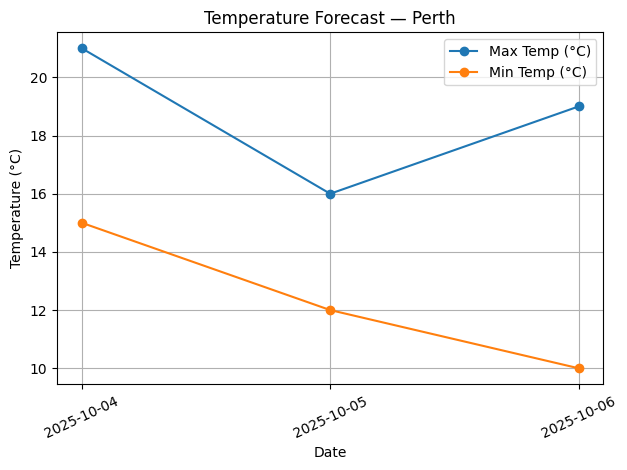

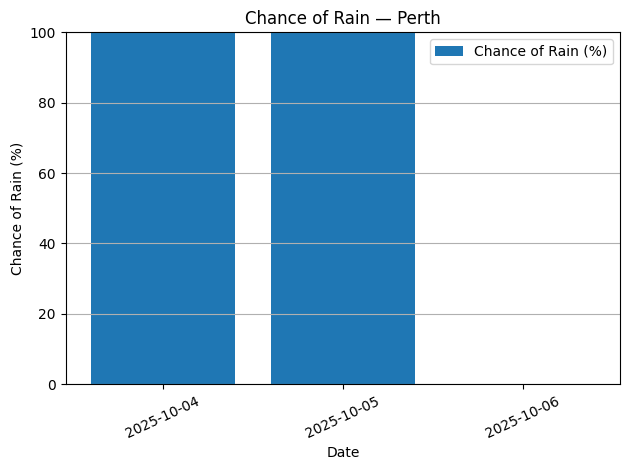

In [43]:
# Test 4 ‚Äî Visualisations (live data)

print("Test 4: Visualisations for Perth (3-day)")
wd_viz = get_weather_data("Perth", forecast_days=3, units="m")
if isinstance(wd_viz, dict) and "error" not in wd_viz:
    create_temperature_visualisation(wd_viz, output_type='display')
    create_precipitation_visualisation(wd_viz, output_type='display')
else:
    print("Skipped visualisations:", wd_viz)

In [44]:
# Test 5 ‚Äî NLP parsing examples

print("Test 5: parse_weather_question samples")
samples = [
    "Will it rain tomorrow in Perth?",
    "What is the temperature today?",
    "Wind next 3 days for Perth",
    "Humidity in Fremantle",
    "Rain in Perth next 2 days"
]
for q in samples:
    parsed = parse_weather_question(q, default_location="Perth")
    print("Q:", q)
    print("Parsed:", parsed)
    print()


Test 5: parse_weather_question samples
Q: Will it rain tomorrow in Perth?
Parsed: {'location': 'Perth', 'days': 2, 'attribute': 'rain', 'when': 'tomorrow'}

Q: What is the temperature today?
Parsed: {'location': 'Perth', 'days': 1, 'attribute': 'temperature', 'when': 'today'}

Q: Wind next 3 days for Perth
Parsed: {'location': 'Perth', 'days': 3, 'attribute': 'wind', 'when': 'next'}

Q: Humidity in Fremantle
Parsed: {'location': 'Fremantle', 'days': 3, 'attribute': 'humidity', 'when': 'next'}

Q: Rain in Perth next 2 days
Parsed: {'location': 'Perth next', 'days': 2, 'attribute': 'rain', 'when': 'next'}



In [45]:
# Test 6 ‚Äî End-to-end Q&A (parse -> fetch -> respond)

print("Test 6: End-to-end Q&A")
q = "Will it rain tomorrow in Perth?"
parsed = parse_weather_question(q, default_location="Perth")
wd = get_weather_data(parsed.get("location", "Perth"), forecast_days=parsed.get("days", 3), units="m")
resp = generate_weather_response(parsed, wd)
print("Question:", q)
print("Response:", resp)


Test 6: End-to-end Q&A
Question: Will it rain tomorrow in Perth?
Response: In Perth (2025-10-05), chance of rain is 100%, expected precipitation 1.5 mm.


## üóÇÔ∏è AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.